In [239]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
%matplotlib inline
sns.set()
from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization
import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product                    # some useful functions
from tqdm import tqdm_notebook

import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')

%matplotlib inline

In [240]:
path = r'rnd/2013-8/'                     # use your path
all_files = glob.glob(os.path.join(path, "1*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent

df_from_each_file = (pd.read_csv(f, sep = ';\t') for f in all_files)
concatenated_df   = pd.concat(df_from_each_file)

In [241]:
concatenated_df['Timestamp'] = pd.to_datetime(concatenated_df['Timestamp [ms]'], unit = 's')

,Timestamp [ms],CPU cores,CPU capacity provisioned [MHZ],CPU usage [MHZ],CPU usage [%],Memory capacity provisioned [KB],Memory usage [KB],Disk read throughput [KB/s],Disk write throughput [KB/s],Network received throughput [KB/s],Network transmitted throughput [KB/s],Timestamp
0,1375308176,2,5851.998900,747.105193,12.766667,8388608.0,1.308620e+06,0.000000,1.000000,11.000000,27.200000,1375308176000000000
1,1375308476,2,5851.998900,672.979873,11.500000,8388608.0,1.157626e+06,0.000000,1.000000,13.466667,30.666667,1375308476000000000
2,1375308776,2,5851.998900,743.203860,12.700000,8388608.0,1.157626e+06,0.000000,1.000000,13.400000,33.466667,1375308776000000000
3,1375309076,2,5851.998900,758.809191,12.966667,8388608.0,1.073741e+06,0.000000,1.000000,11.866667,27.666667,1375309076000000000
4,1375309376,2,5851.998900,661.275876,11.300000,8388608.0,9.730760e+05,0.000000,0.933333,13.333333,31.933333,1375309376000000000
5,1375309676,2,5851.998900,764.661190,13.066667,8388608.0,1.224735e+06,0.000000,2.466667,13.066667,32.000000,1375309676000000000
6,1375309976,2,5851.998900,743.203860,12.700000,8388608.0,9.395216e+05,0.066667,1.333333,11.800000,27.666667,1375309976000000000
7,1375310276,2,5851.998900,653.473211,11.166667,8388608.0,7.381960e+05,0.000000,0.933333,13.666667,33.800000,1375310276000000000
8,1375310576,2,5851.998900,752.957192,12.866667,8388608.0,7.549736e+05,0.000000,0.933333,12.533333,30.133333,1375310576000000000
9,1375310876,2,5851.998900,698.338535,11.933333,8388608.0,7.326035e+05,0.000000,1.200000,11.933333,27.733333,1375310876000000000


In [242]:
concatenated_df['Timestamp'] = pd.to_datetime(concatenated_df['Timestamp [ms]'], unit = 's')
concatenated_df.apply(pd.to_numeric, errors='ignore')
concatenated_df.describe()
concatenated_df['weekday'] = concatenated_df['Timestamp'].dt.dayofweek

concatenated_df['weekend'] = ((concatenated_df.weekday) // 5 == 1).astype(float)
# Feature engineering with the date
concatenated_df['month']=concatenated_df.Timestamp.dt.month 
concatenated_df['day']=concatenated_df.Timestamp.dt.day
concatenated_df.set_index('Timestamp',inplace=True)

In [243]:
concatenated_df["CPU usage prev"] = concatenated_df['CPU usage [%]'].shift(1)

In [244]:
concatenated_df["CPU_diff"] = concatenated_df['CPU usage [%]'] - concatenated_df["CPU usage prev"]

In [245]:
concatenated_df["received_prev"] = concatenated_df['Network received throughput [KB/s]'].shift(1)
concatenated_df["received_diff"] = concatenated_df['Network received throughput [KB/s]']- concatenated_df["received_prev"]

concatenated_df["transmitted_prev"] = concatenated_df['Network transmitted throughput [KB/s]'].shift(1)
concatenated_df["transmitted_diff"] = concatenated_df['Network transmitted throughput [KB/s]']- concatenated_df["transmitted_prev"]

## visualizing 


In [246]:
cpu = concatenated_df[['CPU usage [MHZ]']]
receive = concatenated_df[['Network received throughput [KB/s]']]
transmit = concatenated_df[['Network transmitted throughput [KB/s]']]

In [247]:
mem = concatenated_df[['Memory usage [KB]']]
memprov = concatenated_df[['Memory capacity provisioned [KB]']]

In [248]:
provisioned = concatenated_df[['CPU capacity provisioned [MHZ]']]

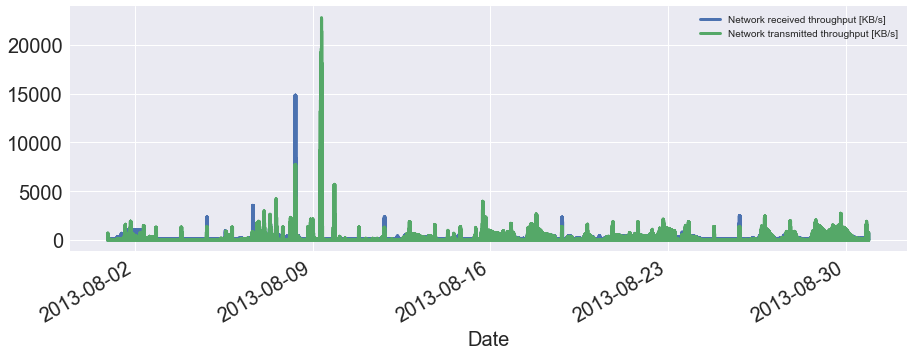

In [249]:
## Visualize rolling mean trends over time, large spike, keep in model
df_rm = pd.concat([receive.rolling(12).mean(), transmit.rolling(12).mean()], axis=1)
df_rm.plot(figsize=(15,5), linewidth=3, fontsize=20)
plt.xlabel('Date', fontsize=20);

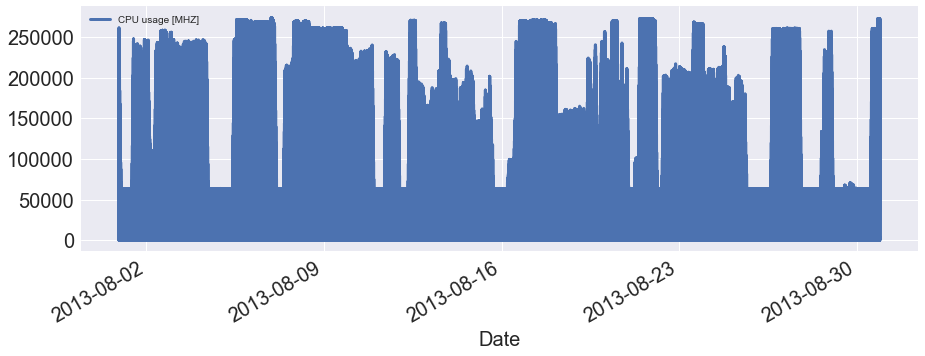

In [250]:
## Visualize rolling mean trends over time, large spike, keep in model
df_rm = pd.concat([cpu.rolling(24).sum()], axis=1)
df_rm.plot(figsize=(15,5), linewidth=3, fontsize=20)
plt.xlabel('Date', fontsize=20);


# looking at trends over the week and on weekends

In [251]:
## Weekends are slower than weekdays. Throughput increases over the week
daysofweekavg = pd.pivot_table(concatenated_df, values = "Network transmitted throughput [KB/s]", 
                             columns = "weekday", index = "month")
daysofweekavg

weekday,0,1,2,3,4,5,6
month,,,,,,,
7,NaN,NaN,1.311093,NaN,NaN,NaN,NaN
8,4.532436,7.690844,10.518435,15.534393,22.820654,3.949266,2.660002


In [252]:
## Weekends are slower than weekdays. Throughput increases until Thursday, Friday is lower
daysofweekavg = pd.pivot_table(concatenated_df, values = "Network received throughput [KB/s]", 
                             columns = "weekday", index = "month")
daysofweekavg

weekday,0,1,2,3,4,5,6
month,,,,,,,
7,NaN,NaN,5.652131,NaN,NaN,NaN,NaN
8,6.733847,8.898677,8.231980,13.892017,8.477589,5.425411,5.34331


In [253]:
#Again, weekends are not used much
weekendavg = pd.pivot_table(concatenated_df, values = "CPU usage [MHZ]", 
                             columns = "weekend", index = "month")
weekendavg

weekend,0.0,1.0
month,,
7,142.024094,NaN
8,454.442004,377.061704


In [254]:
#Again, weekends are not used much, Thursday and friday see greatest differences in KB transmitted
weekdiffs = pd.pivot_table(concatenated_df, values = "CPU usage [MHZ]", 
                             columns = "weekday", index = "month")
weekdiffs

weekday,0,1,2,3,4,5,6
month,,,,,,,
7,NaN,NaN,142.024094,NaN,NaN,NaN,NaN
8,401.957882,563.060227,411.181846,410.632848,488.576145,482.19631,271.865379


In [255]:
#Again, weekends are not used much, But they are still provisioning as if it were a weekday
weekdiffs = pd.pivot_table(concatenated_df, values = "CPU capacity provisioned [MHZ]", 
                             columns = "weekday", index = "month")
weekdiffs

weekday,0,1,2,3,4,5,6
month,,,,,,,
7,NaN,NaN,7288.268712,NaN,NaN,NaN,NaN
8,7709.190917,7709.891601,7709.889823,7685.321797,7737.674082,7710.410902,7709.884802


# Working in hours, wanted to change to minutes- tried, but code won't work
## These graphs show the resampled hourly rates and usage. Resampling provides an easier way to visualize the data over time (compared to ms). Also, it helps us identify any trends in the data.

### These graphs seem to suggest we should standardize the data (log transform or z-score) to make sure they are on the same scale.

In [158]:
def moving_average(series, n):
    """
        Calculate average of last n observations
    """
    return np.average(series[-n:])

moving_average(cpu, 24) # prediction for the last observed day (past 24 hours)

110.06663885366667

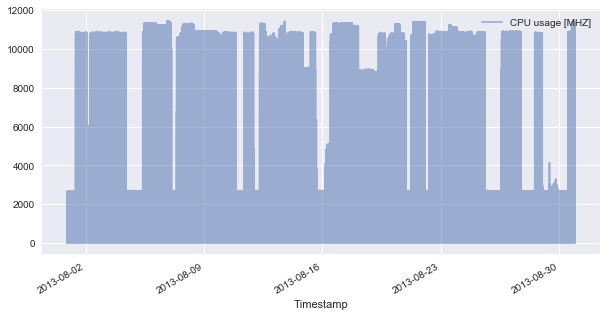

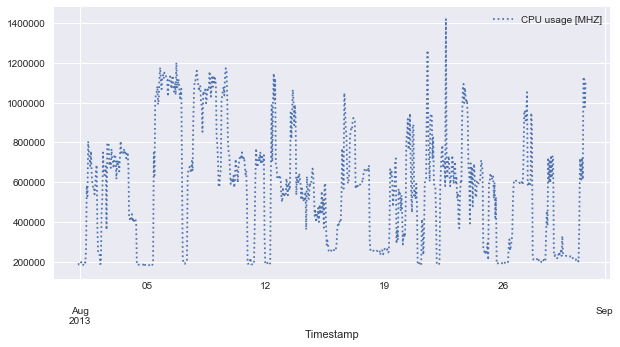

In [159]:
cpu.plot(alpha=0.5, style='-', figsize=(10, 5))
plt.legend(loc='upper right');
cpu.resample('H').sum().plot(style=':', figsize=(10, 5))
#cpu.asfreq('H').plot(style='--');
plt.legend(loc='upper right');

# Resampled MAX values

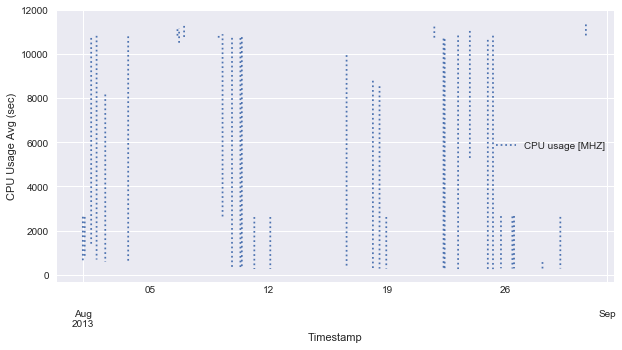

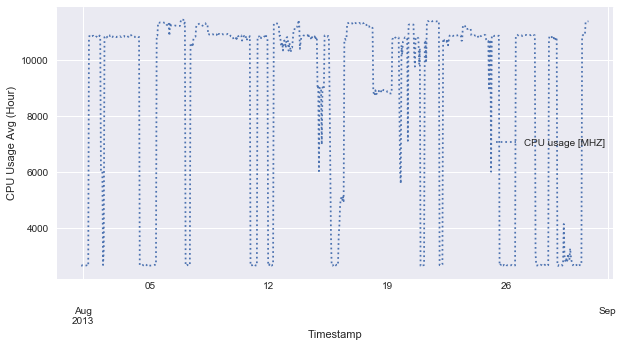

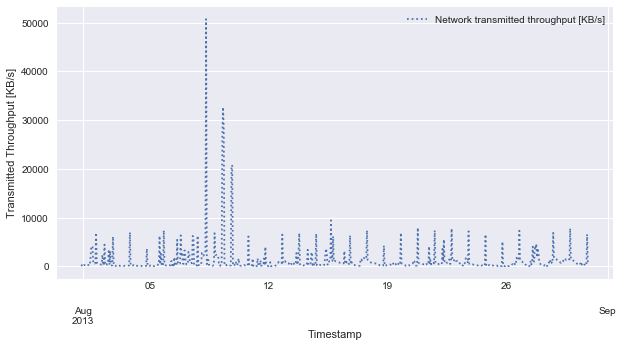

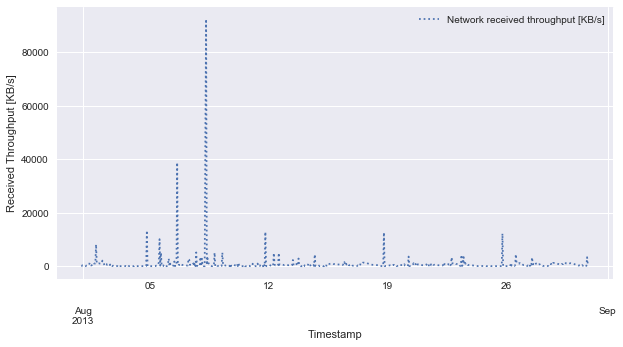

In [238]:
hourlycpu = cpu.resample('H').max()
hourlycpu.plot(style=[':', '--', '-'], figsize=(10, 5))
plt.ylabel('CPU Usage Avg (Hour)');

hourlytransmit = transmit.resample('H').max()
hourlytransmit.plot(style=[':', '--', '-'], figsize=(10, 5))
plt.ylabel('Transmitted Throughput [KB/s]');

hourlyreceive = receive.resample('H').max()
hourlyreceive.plot(style=[':', '--', '-'], figsize=(10, 5))
plt.ylabel('Received Throughput [KB/s]');

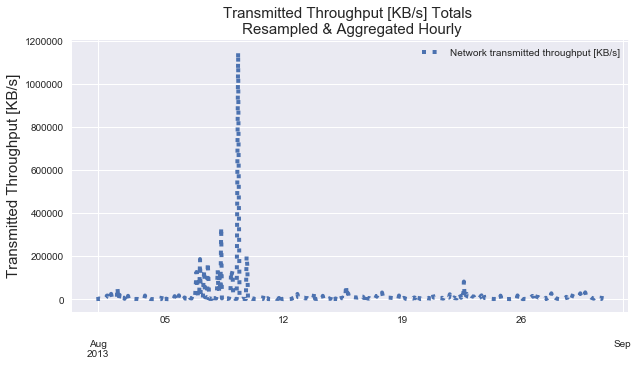

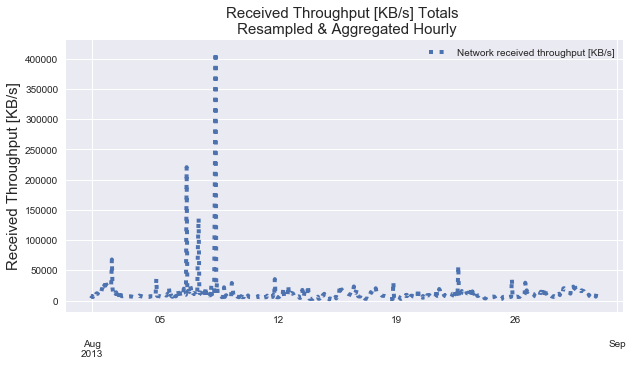

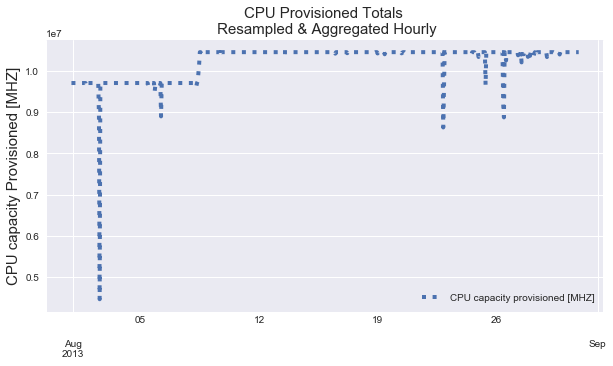

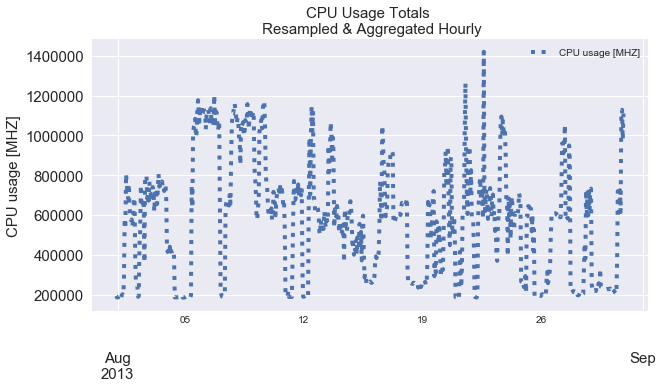

In [304]:
hourlytransmit = transmit.resample('H').sum()
hourlytransmit.plot(style=[':', '--', '-'],linewidth = 4,  figsize=(10, 5))
plt.title('Transmitted Throughput [KB/s] Totals \n Resampled & Aggregated Hourly',fontsize=15);
plt.ylabel('Transmitted Throughput [KB/s]', fontsize=15);
plt.xlabel('', fontsize=15);

hourlyreceive = receive.resample('H').sum()
hourlyreceive.plot(style=[':', '--', '-'], linewidth = 4, figsize=(10, 5))
plt.title('Received Throughput [KB/s] Totals \n Resampled & Aggregated Hourly',fontsize=15);
plt.ylabel('Received Throughput [KB/s]', fontsize=15);
plt.xlabel('', fontsize=15);

hourlycpuprovisioned = provisioned.resample('H').sum()
hourlycpuprovisioned.plot(style=[':', '--', '-'], linewidth = 4, figsize=(10, 5))
plt.title('CPU Provisioned Totals \n Resampled & Aggregated Hourly',fontsize=15);
plt.ylabel('CPU capacity Provisioned [MHZ]', fontsize=15);
plt.xlabel('', fontsize=15);

hourlycpu = cpu.resample('H').sum()
hourlycpu.plot(style=[':', '--', '-'], linewidth = 4, figsize=(10, 5))
plt.title('CPU Usage Totals \n Resampled & Aggregated Hourly',fontsize=15);
plt.ylabel('CPU usage [MHZ]', fontsize=15);
plt.xlabel('', fontsize=15);
plt.yticks(fontsize=15);
plt.xticks(fontsize=15);



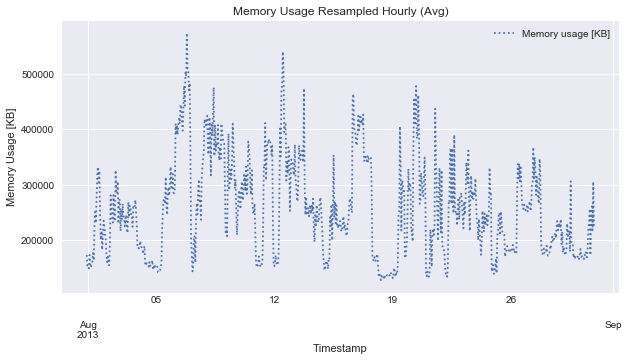

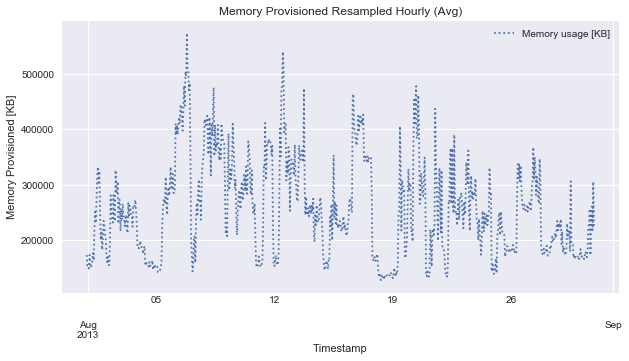

In [162]:
hourlymem = mem.resample('H').mean()
hourlymem.plot(style=[':', '--', '-'], figsize=(10, 5))
plt.title('Memory Usage Resampled Hourly (Avg)')
plt.ylabel('Memory Usage [KB]');

hourlymemprov = memprov.resample('H').mean()
hourlymem.plot(style=[':', '--', '-'], figsize=(10, 5))
plt.title('Memory Provisioned Resampled Hourly (Avg)')
plt.ylabel('Memory Provisioned [KB]');


## zoom in to look at hourly trends in cpu usage


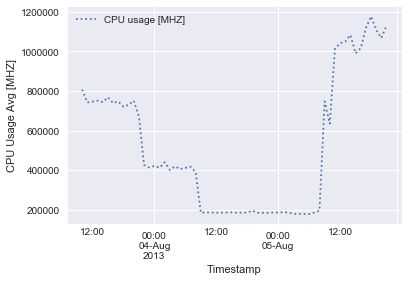

In [163]:
hourlycpu[60:120].plot(style=[':', '--', '-'])
plt.ylabel('CPU Usage Avg [MHZ]');

### Check for every day?? weekday???

## zoom in to look at weekly trends in cpu usage


### Create hourlydat DF, which is the concatenated_df, resampled over each hour. DONT USE LOGS!!!!


In [166]:
hourlydat = concatenated_df.resample('H').sum()
hourlydat['Date_Time'] = hourlydat.index
hourlydat['weekday'] = hourlydat['Date_Time'].dt.dayofweek


hourlydat['weekend'] = ((hourlydat.weekday) // 5 == 1).astype(float)
# Feature engineering with the date
hourlydat['month']=hourlydat['Date_Time'].dt.month 
hourlydat['day']=hourlydat['Date_Time'].dt.day

In [168]:
hourlydat.drop('Date_Time', axis=1, inplace=True)
hourlydat.drop('Timestamp [ms]', axis=1, inplace=True)


In [174]:
#Again, weekends are not used much, Thursday and friday see greatest differences in KB transmitted
weekdiffs = pd.pivot_table(hourlydat, values = "CPU usage [MHZ]", 
                             columns = "weekend", index = "month")
weekdiffs

weekend,0.0,1.0
month,,
7,189176.093198,NaN
8,603661.404800,501941.791277


In [263]:
plotdays = hourlydat.groupby('weekday').agg({'CPU usage [MHZ]': ['mean']})
#plotdaysprov = hourlydat.groupby('weekday').agg({'CPU capacity provisioned [MHZ]': ['mean']})
plotdays = pd.DataFrame(plotdays)
#plotdays['CPU capacity provisioned [MHZ]'] = plotdaysprov

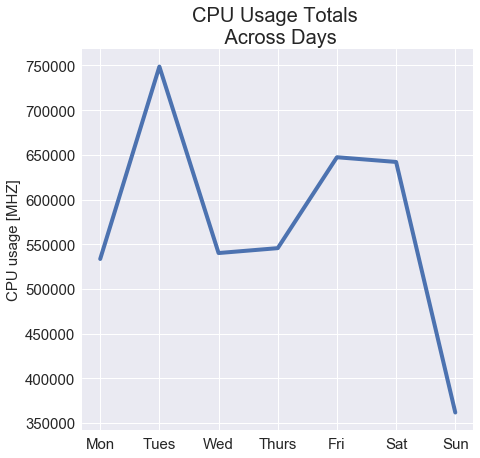

In [264]:
plotdays.plot(linewidth = 4, figsize=(7, 7),legend=None)
plt.title('CPU Usage Totals \n Across Days',fontsize=20);
plt.ylabel('CPU usage [MHZ]', fontsize=15);
plt.xlabel('', fontsize=15);
plt.xticks(np.arange(7), ('Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'), fontsize=15);
plt.yticks(fontsize=15);

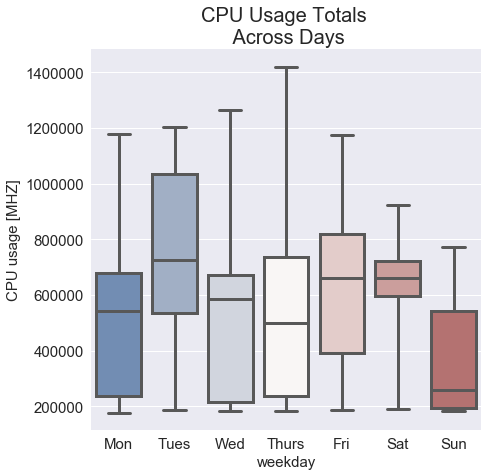

In [287]:
plt.figure(figsize=(7,7))
plt.title('CPU Usage Totals \n Across Days',fontsize=20);
plt.ylabel('CPU usage [MHZ]', fontsize=15);
plt.yticks(fontsize=15);
plt.xlabel('', fontsize=15);
sns.boxplot(y=hourlydat['CPU usage [MHZ]'],x = hourlydat.weekday,
            whis=np.inf, palette="vlag",linewidth=3)
plt.xticks(np.arange(7), ('Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'), fontsize=15);

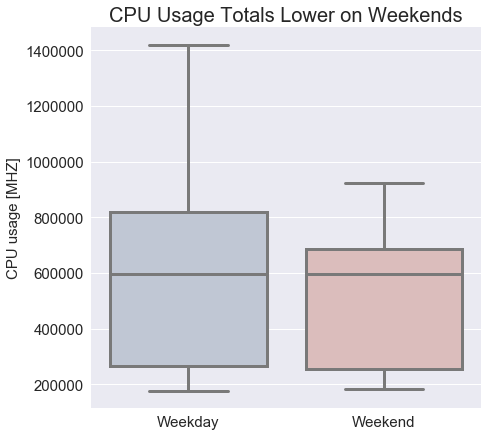

In [303]:
plt.figure(figsize=(7,7))
plt.title('CPU Usage Totals Lower on Weekends',fontsize=20);
plt.ylabel('CPU usage [MHZ]', fontsize=15);
plt.yticks(fontsize=15);
sns.boxplot(y=hourlydat['CPU usage [MHZ]'],x = hourlydat.weekend,
            whis=np.inf, palette="vlag",linewidth=3)
plt.xticks(np.arange(2), ('Weekday', 'Weekend'), fontsize=15);
plt.xlabel('', fontsize=15);


## Hourly resampled means
last 10 hours of CPU is helpful, so we have short term prediction power

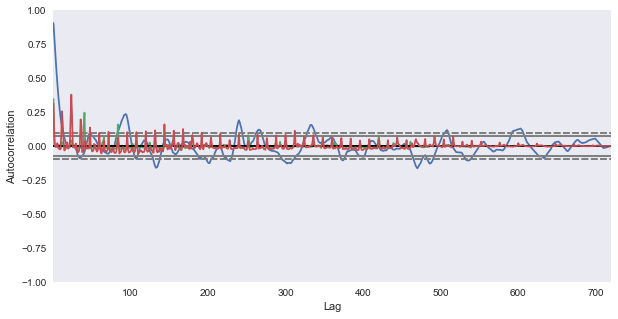

In [290]:
plt.figure(figsize=(10,5))
pd.plotting.autocorrelation_plot(hourlycpu);
pd.plotting.autocorrelation_plot(hourlyreceive);
pd.plotting.autocorrelation_plot(hourlytransmit);

## Is CPU Capacity Ever Met? If so, how often?

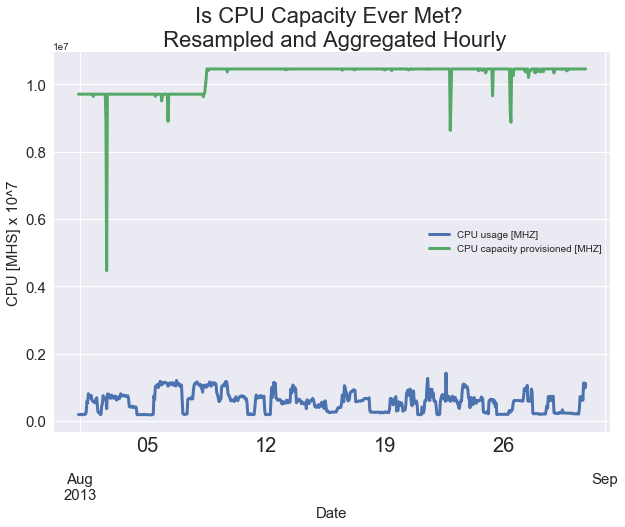

In [237]:
overprovision = hourlycpu.copy()
overprovision['CPU capacity provisioned [MHZ]'] = hourlycpuprovisioned

overprovision.plot(figsize = (10,7),linewidth=3, fontsize=20)
plt.title('Is CPU Capacity Ever Met? \n Resampled and Aggregated Hourly',fontsize=22)
plt.ylabel('MHZ  x  10^7', fontsize=15);
plt.xlabel('Date', fontsize=15);
plt.tick_params(labelsize=15)
plt.ylabel("CPU [MHS] x 10^7", fontsize = 15)
plt.xticks( fontsize = 15)
plt.show()
#plt.plot(hourlydat['CPU usage [MHZ]'])
#plt.plot(hourlydat['CPU capacity provisioned [MHZ]'])


## quantify CPU Overprovision

In [134]:
overprovision['Over Provisioned Amount [MHZ]']  = overprovision['CPU capacity provisioned [MHZ]'] - overprovision['CPU usage [MHZ]']

## reorganizing column names and standardize DF
## converting hourlydat --> standardizeddf


In [136]:
hourlydat = hourlydat[['CPU capacity provisioned [MHZ]', 'CPU usage [MHZ]', 'CPU usage [%]','Memory capacity provisioned [KB]','Memory usage [KB]', 'Disk read throughput [KB/s]', 'Disk write throughput [KB/s]', 'Network received throughput [KB/s]', 'Network transmitted throughput [KB/s]','CPU usage prev', 'CPU_diff', 'received_prev', 'received_diff','transmitted_prev', 'transmitted_diff', 'weekday', 'weekend', 'month', 'day','CPU cores']]

hourlydatrest = hourlydat[hourlydat.columns[15:21]]


from scipy.stats import zscore
#remove first row with NA's from previous shift, that way we can get z scores
standardizeddf = hourlydat.iloc[1:]
standardizeddf = standardizeddf[standardizeddf.columns[0:15]].apply(zscore) 

,CPU capacity provisioned [MHZ],CPU usage [MHZ],CPU usage [%],Memory capacity provisioned [KB],Memory usage [KB],Disk read throughput [KB/s],Disk write throughput [KB/s],Network received throughput [KB/s],Network transmitted throughput [KB/s],CPU usage prev,CPU_diff,received_prev,received_diff,transmitted_prev,transmitted_diff,weekday,weekend,month,day,CPU cores
Timestamp,,,,,,,,,,,,,,,,,,,,
2013-07-31 22:00:00,9.707974e+06,192806.006294,2595.527381,8.825362e+09,2.310630e+08,1667.666667,16599.587179,8081.809524,1559.014286,3298.044048,-715.283333,8501.276190,-430.466667,2298.547619,-766.733333,2664,0.0,9324,41292,3624
2013-07-31 23:00:00,9.707974e+06,185546.180103,2532.346429,8.825374e+09,2.058822e+08,1460.924176,15401.735897,6975.466667,1933.738095,2538.444048,-6.097619,7117.933333,-142.466667,1934.466667,-0.728571,2664,0.0,9324,41292,3624
2013-08-01 00:00:00,9.707974e+06,185886.294113,2540.528571,8.825390e+09,2.071156e+08,617.200000,15147.988745,7599.404762,2587.800000,2539.864286,0.664286,7597.871429,1.533333,2572.404762,15.395238,3996,0.0,10656,1332,3624
2013-08-01 01:00:00,9.707974e+06,185504.462198,2543.828571,8.825419e+09,1.989030e+08,791.533333,12163.442857,5597.419048,2251.590476,2541.150000,2.678571,5659.266667,-61.847619,2148.266667,103.323810,3996,0.0,10656,1332,3624
2013-08-01 02:00:00,9.707974e+06,199263.307042,2677.261905,8.825485e+09,2.313761e+08,2491.614286,27227.404762,9797.895238,4755.566667,2677.702381,-0.440476,9599.847619,198.047619,4865.671429,-110.104762,3996,0.0,10656,1332,3624


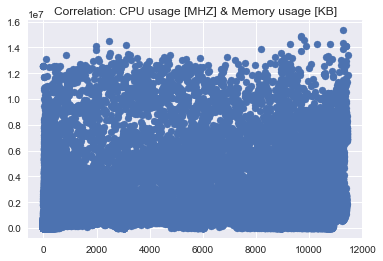

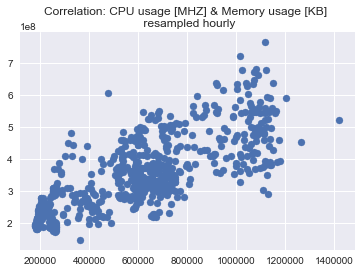

In [44]:
#visualize correlations

# probably different correlations/slopes for different VMs/apps leading to this mess
concatenated_df['CPU usage [MHZ]']
plt.scatter(concatenated_df['CPU usage [MHZ]'], concatenated_df['Memory usage [KB]'])
plt.title("Correlation: CPU usage [MHZ] & Memory usage [KB]")
plt.show()

#However, when looking at HOURLY resampled data, there is a POS correlation between cpu and mem usage
plt.scatter(hourlydat['CPU usage [MHZ]'], hourlydat['Memory usage [KB]'])
plt.title("Correlation: CPU usage [MHZ] & Memory usage [KB] \n resampled hourly")
plt.show()

## reorganizing column names and standardize DF
## converting hourlydat --> standardizeddf

In [45]:
hourlydat = hourlydat[['CPU capacity provisioned [MHZ]', 'CPU usage [MHZ]', 'CPU usage [%]','Memory capacity provisioned [KB]','Memory usage [KB]', 'Disk read throughput [KB/s]', 'Disk write throughput [KB/s]', 'Network received throughput [KB/s]', 'Network transmitted throughput [KB/s]','CPU usage prev', 'CPU_diff', 'received_prev', 'received_diff','transmitted_prev', 'transmitted_diff', 'weekday', 'weekend', 'month', 'day','CPU cores']]

In [46]:
from scipy.stats import zscore
#remove first row with NA's from previous shift, that way we can get z scores
standardizeddf = hourlydat.iloc[1:]
standardizeddf = standardizeddf[standardizeddf.columns[0:15]].apply(zscore) 

In [47]:
#standardizeddf.head()

## Create DF with standardized z scores

In [48]:
#standardizeddf.describe()

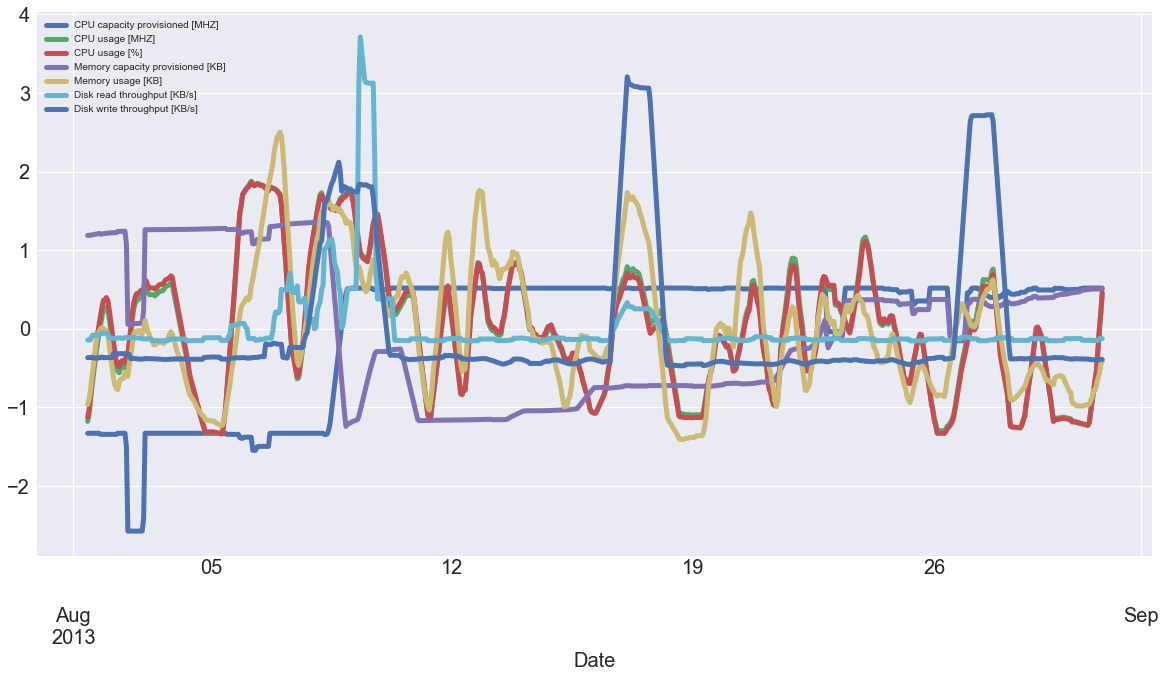

In [49]:
df_rm2 = standardizeddf.iloc[:,0:7].rolling(12).mean()
df_rm2.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Date', fontsize=20);


## Visualize Correlations in Data (hourlydat)

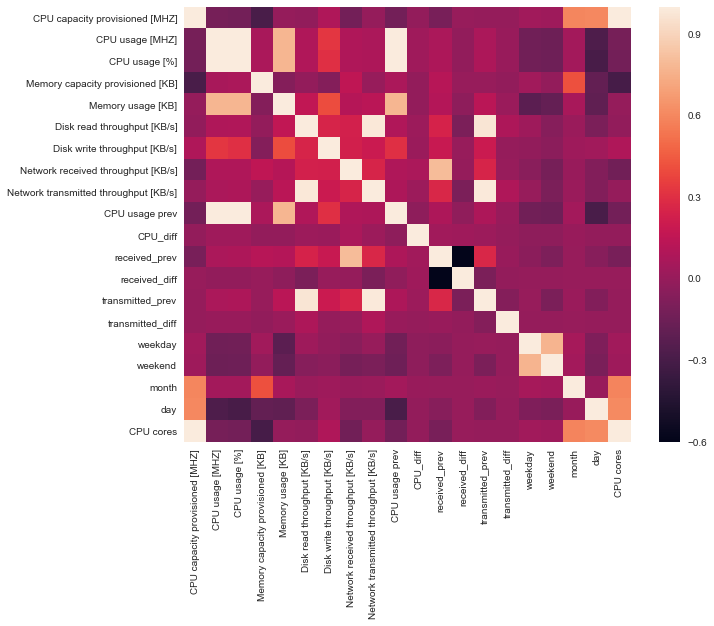

In [53]:
plt.figure(figsize=(10, 8))
sns.heatmap(hourlydat.corr());